In [1]:
#Import packages
import sympy as sp
import pandas as pd
import numpy as np
import scipy as sc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy import optimize
import math

In [2]:
#We'll work through each of the cases in the order of the paper for a special case (with a particular p and cost function).

#First, we will find the bonuses and profits under the First-best.
#Second, we will find bonuses and profits under a myopic firm.
#Third, we will work with the sophisticated firm.
#Fourth, we will work in the case the firm knows the agents attitudes.
#Fifth and finall, we will solve the case in which the firm can observe the type but effort is not contractible.

In [3]:
#First, let us define the probability of succes function and the cost functions for high types and low types.

e, thetah, thetal = sp.symbols('e theta_h theta_l')

p = e/(1+e)
Cl = 1/3*e**(3)*1/thetal
Ch = 1/3*e**(3)*1/thetah

In [4]:
#1) First Best.

#Define the variables needed (R, wages, bonuses and effort levels for each type)

R, wh, wl, bl, bh, ehh, ehl, ell, elh, alpha, lamb = sp.symbols('R w_h w_l b_l b_h e_hh e_hl e_ll e_lh alpha lambda')

#Wages are set to meet the IR constraints.
whhopt = Ch.subs(e, ehh)
whlopt = Ch.subs(e, ehl)
wllopt = Cl.subs(e, ell)
wlhopt = Cl.subs(e, elh)

#Define the profit function in terms of effort levels
pihh = (0.5*(1-alpha)*(1-lamb)+(1-alpha)*lamb)*(p.subs(e,ehh)*R-whhopt)
pihl = 0.5*alpha*lamb*(p.subs(e,ehl)*R-whlopt)
pill = (0.5*alpha*lamb+alpha*(1-lamb))*p.subs(e,ell)*R-wllopt
pilh = 0.5*(1-alpha)*(1-lamb)*(p.subs(e,elh)*R-wlhopt)
pi = pihh + pihl + pill + pilh

#Solve for the optimal effort choices
ehhopt = sp.solve(sp.Eq(pi.diff(ehh),0),ehh)[3]
ehlopt = sp.solve(sp.Eq(pi.diff(ehl),0),ehl)[3]
ellopt = sp.solve(sp.Eq(pi.diff(ell),0),ell)[3]
elhopt = sp.solve(sp.Eq(pi.diff(elh),0),elh)[3]

#Substitute the optimal effort choices into the profit function
piopt = pi.subs({ehh: ehhopt, ehl: ehlopt, ell: ellopt, elh: elhopt})

#Find the utilities of each type of agent
Uhh = whhopt.subs(ehh, ehhopt) - Ch.subs(e, ehhopt)
Uhl = whlopt.subs(ehl, ehlopt) - Cl.subs(e, ehlopt)
Ull = wllopt.subs(ell, ellopt) - Cl.subs(e, ellopt)
Ulh = wlhopt.subs(elh, elhopt) - Ch.subs(e, elhopt)

#Workers welfare and total welfare
WW = Uhh + Uhl + Ull + Ulh
W = WW + piopt



In [5]:
'''

DISCUSS WITH HUIXIN

#The problem can be equivallently solved by maximizing the profit function with respect to the bonuses
bhopt = Ch.subs(e, eh)/(p.subs(e, eh))
blopt = Cl.subs(e, el)/(p.subs(e, el))

pi2 = (1-alpha)*p.subs(e, eh) * (R - bhopt) + alpha * p.subs(e, el) * (R - blopt)
ehopt2 = sp.solve(sp.Eq(pi2.diff(eh),0),eh)[3]
elopt2 = sp.solve(sp.Eq(pi2.diff(el),0),el)[3]
piopt2 = pi2.subs(eh, ehopt2).subs(el, elopt2)

'''

'\n\nDISCUSS WITH HUIXIN\n\n#The problem can be equivallently solved by maximizing the profit function with respect to the bonuses\nbhopt = Ch.subs(e, eh)/(p.subs(e, eh))\nblopt = Cl.subs(e, el)/(p.subs(e, el))\n\npi2 = (1-alpha)*p.subs(e, eh) * (R - bhopt) + alpha * p.subs(e, el) * (R - blopt)\nehopt2 = sp.solve(sp.Eq(pi2.diff(eh),0),eh)[3]\nelopt2 = sp.solve(sp.Eq(pi2.diff(el),0),el)[3]\npiopt2 = pi2.subs(eh, ehopt2).subs(el, elopt2)\n\n'

In [6]:
#1.1) First Best DF creation

# First lets define the parameters that we will keep fixed
R_value = 10
theta_h_value = 10
theta_l_value = 1

#Now we define parameters for which we are interested to see how the main outcome variables of the model change
alpha_values = np.linspace(0.00001,0.99999,20)
lambda_values = np.linspace(0.00001,0.99999,20)

#Lets create a list to store the results
resultsFB = []

#Now we will loop over the values of alpha and lambda to calculate the optimal effort levels, bonuses, wages and profits
for alpha_value in alpha_values:
    for lambda_value in lambda_values:
        #First the optimal wages
        whhopt = (whhopt.subs(ehh,ehhopt)).subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        whlopt = (whlopt.subs(ehl,ehlopt)).subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        wllopt = (wllopt.subs(ell,ellopt)).subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        wlhopt = (wlhopt.subs(elh,elhopt)).subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        
        #We can now get the profit of the firm
        piopt = piopt.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        
        #Find the utilities of each type of agent
        Uhh = Uhh.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        Uhl = Uhl.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        Ull = Ull.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        Ulh = Ulh.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
    
        #Workers welfare and total welfare
        WW = Uhh + Uhl + Ull + Ulh
        W = WW + piopt
        
        #Store the results
        resultsFB.append({"alphaFB":alpha_value, "lambdaFB":lambda_value, "whhFB":whhopt, "whlFB":whlopt, "wllFB":wllopt, "wlhFB":wlhopt, "piFB":piopt, "UhhFB":Uhh, "UhlFB":Uhl, "UllFB":Ull, "UlhFB":Ulh, "WWFB":WW, "WFB":W})
        
#Convert the results to a DataFrame
dfFB = pd.DataFrame(resultsFB)
dfFB

,alphaFB,lambdaFB,whhFB,whlFB,wllFB,wlhFB,piFB,UhhFB,UhlFB,UllFB,UlhFB,WWFB,WFB
0,0.00001,0.000010,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458
1,0.00001,0.052641,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458
2,0.00001,0.105271,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458
3,0.00001,0.157902,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458
4,0.00001,0.210532,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.99999,0.789468,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458
396,0.99999,0.842098,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458
397,0.99999,0.894729,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458
398,0.99999,0.947359,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,0.733586719042796,-5.18156827272140,0.601268388161458


In [7]:
#2) Myopic Firm

#Now we need to define 4 different effort choices (ehh, ehl, ell, elh). However the firm will by ignorant of these.

ehh, ehl, ell, elh = sp.symbols('e_hh e_hl e_ll e_lh')

#The myopic firm will anticipate the following expost effort choices as a function of the bonuses

ehopt = sp.solve(sp.Eq(sp.diff(p*bh-Ch, e),0),e)[3]
elopt = sp.solve(sp.Eq(sp.diff(p*bl-Cl, e),0),e)[3]

#And maximize profits naively
pi = (1-alpha)*p.subs(e, ehopt) * (R - bh) + alpha * p.subs(e, elopt) * (R - bl)
bhopt = sp.solve(sp.Eq(pi.diff(bh),0),bh)[0]
blopt = sp.solve(sp.Eq(pi.diff(bl),0),bl)[0]

#The firm will set the wages to comply with IC

#The anticipated profit will be
piExp = pi.subs(bh, bhopt).subs(bl, blopt)

#But the actual expost effort choices will be different.
ehhopt = sp.solve(sp.Eq(sp.diff(p*bhopt-Ch, e),0),e)[2]
ehlopt = sp.solve(sp.Eq(sp.diff(p*bhopt-Cl, e),0),e)[3]
ellopt = sp.solve(sp.Eq(sp.diff(p*blopt-Cl, e),0),e)[2]
elhopt = sp.solve(sp.Eq(sp.diff(p*blopt-Ch, e),0),e)[3]

#The actual profit will be
pihh = (0.5*(1-alpha)*(1-lamb)+(1-alpha)*lamb)*(p.subs(e,ehhopt)*(R-bhopt)-wh)
pihl = 0.5*alpha*lamb*(p.subs(e,ehlopt)*(R-bhopt)-wh)
pill = (0.5*alpha*lamb+alpha*(1-lamb))*(p.subs(e,ellopt)*(R-blopt)-wl)
pilh = 0.5*(1-alpha)*(1-lamb)*(p.subs(e,elhopt)*(R-blopt)-wl)
piAct = pihh + pihl + pill + pilh


#The utilities of each type of agent will be
Uhh = p.subs(e,ehhopt)*(bhopt)+wh - Ch.subs(e,ehhopt)
Uhl = p.subs(e,ehlopt)*(bhopt)+wh - Cl.subs(e,ehlopt)
Ull = p.subs(e,ellopt)*(blopt)+wl - Cl.subs(e,ellopt)
Ulh = p.subs(e,elhopt)*(blopt)+wl - Ch.subs(e,elhopt)

#Workers welfare and total welfare
WW = Uhh + Uhl + Ull + Ulh
W = WW + piAct


In [8]:
#2.1) Myopic Firm DF creation

# First lets define the parameters that we will keep fixed
R_value = 10
theta_h_value = 10
theta_l_value = 1

#Now we define parameters for which we are interested to see how the main outcome variables of the model change
alpha_values = np.linspace(0.00001,0.99999,20)
lambda_values = np.linspace(0.00001,0.99999,20)

#Lets create a list to store the results
resultsMyo = []

#Now we will loop over the values of alpha and lambda to calculate the optimal effort levels, bonuses, wages and profits
for alpha_value in alpha_values:
    for lambda_value in lambda_values:
        #First the optimal bonuses
        bhopt = bhopt.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        blopt = blopt.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
        
        #Now we find the optimal wages to guarantee incentive compatibility
        if blopt > bhopt:
            wlopt = 0
            ICH = (p.subs(e, ehhopt)*(R-bhopt) - Ch.subs(e, ehhopt)).subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
            eICH = sp.solve((blopt*p-Ch).subs(thetah,theta_h_value).diff(e))[1]
            ICHL = (p.subs(e, eICH)*(R-blopt) - Ch.subs(e, eICH)).subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
            whopt = max(0, ICHL-ICH)
        elif blopt < bhopt:
            whopt = 0
            ICL = (p.subs(e, ellopt)*(R-blopt) - Cl.subs(e, ellopt)).subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
            eICL = sp.solve((bhopt*p-Cl).subs(thetal,theta_l_value).diff(e))[1]
            ICLH = (p.subs(e, eICL)*(R-bhopt) - Cl.subs(e, eICL)).subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value})
            wlopt = max(0, ICLH-ICL)
        else:
            whopt = 0
            wlopt = 0
            
        
        #We can now get the profit of the firm
        piExp = piExp.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value, bh:bhopt, bl:blopt, wh:whopt, wl:wlopt})
        piAct = piAct.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value, bh:bhopt, bl:blopt, wh:whopt, wl:wlopt})
        
        #Find the utilities of each type of agent
        Uhh = Uhh.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value, bh:bhopt, bl:blopt, wh:whopt, wl:wlopt})
        Uhl = Uhl.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value, bh:bhopt, bl:blopt, wh:whopt, wl:wlopt})
        Ull = Ull.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value, bh:bhopt, bl:blopt, wh:whopt, wl:wlopt})
        Ulh = Ulh.subs({thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lambda_value, R:R_value, bh:bhopt, bl:blopt, wh:whopt, wl:wlopt})
    
        #Workers welfare and total welfare
        WW = Uhh + Uhl + Ull + Ulh
        W = WW + piAct
        
        #Store the results
        resultsMyo.append({'alphaMyo':alpha_value, 'lambdaMyo':lambda_value, 'whMyo':whopt, 'wlMyo':wlopt, 'piMyoAct':piAct, 'piMyoExp':piExp, 'UhhMyo':Uhh, 'UhlMyo':Uhl, 'UllMyo':Ull, 'UlhMyo':Ulh, 'WWMyo':WW, 'WMyo':W})

#Convert the results to a DataFrame
dfMyo = pd.DataFrame(resultsMyo)
dfMyo


,alphaMyo,lambdaMyo,whMyo,wlMyo,piMyoAct,piMyoExp,UhhMyo,UhlMyo,UllMyo,UlhMyo,WWMyo,WMyo
0,0.00001,0.000010,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433
1,0.00001,0.052641,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433
2,0.00001,0.105271,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433
3,0.00001,0.157902,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433
4,0.00001,0.210532,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.99999,0.789468,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433
396,0.99999,0.842098,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433
397,0.99999,0.894729,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433
398,0.99999,0.947359,1.68097873347288,0,1.71683600352211,1.71465632555802,1.68175494806044,1.68127430246074,0.00776214587563498,0.0166946460953928,3.38748604249221,5.10432204601433


In [9]:
#3) Sophisticated Firm

#The sophisticated firm will anticipate the effort choices of the agents correctly.
ehhopt = sp.solve(sp.Eq(sp.diff(p*bh-Ch, e),0),e)[3]
ehlopt = sp.solve(sp.Eq(sp.simplify(sp.diff(p*bh-Cl, e)),0),e)[3]
ellopt = sp.solve(sp.Eq(sp.simplify(sp.diff(p*bl-Cl, e)),0),e)[3]
elhopt = sp.solve(sp.Eq(sp.diff(p*bl-Ch, e),0),e)[3]

#Defining the profit
pihl = 0.5*alpha*lamb*(p.subs(e,ehlopt)*(R-bh)-wh)
pihh = (0.5*(1-alpha)*(1-lamb)+(1-alpha)*lamb)*(p.subs(e,ehhopt)*(R-bh)-wh)
pilh = 0.5*(1-alpha)*(1-lamb)*(p.subs(e,elhopt)*(R-bl)-wl)
pill = (0.5*alpha*lamb+alpha*(1-lamb))*(p.subs(e,ellopt)*(R-bl)-wl)
pi = pihl + pihh + pilh + pill

#The firm will set bonuses to maximize profits. This is done by taking FOC of pi wrt bh and bl
#Then wages are set to comply with IC

#However, the problem is too complicated to solve it analytically. We will solve it numerically in the next cell.



In [10]:
#3.1) Sophisticated Firm DF creation

# First lets define the parameters that we will keep fixed
R_value = 10
theta_h_value = 10
theta_l_value = 1

#Now we define parameters for which we are interested to see how the main outcome variables of the model change
alpha_values = np.linspace(0.00001,0.99999,20)
lambda_values = np.linspace(0.00001,0.99999,20)

#Before starting the loop, let us define some auxiliary functions to avoid taking FOCs at every iteration
bh_aux = sp.diff(pi,bh).subs({thetah:theta_h_value, thetal:theta_l_value, R:R_value})
bl_aux = sp.diff(pi,bl).subs({thetah:theta_h_value, thetal:theta_l_value, R:R_value})

#Lets create a list to store the results
resultsSoph = []

#Now lets start the loop for each value of alpha and lambda

for alpha_value in alpha_values:
    print(alpha_value)
    
    for lamb_value in lambda_values:
        
        #We first get the optimal bonuses
        bh_aux1 = bh_aux.subs({alpha:alpha_value, lamb:lamb_value})
        
        bl_aux1 = bl_aux.subs({alpha:alpha_value, lamb:lamb_value})
        
        bhopt = sp.nsolve(bh_aux1, 0.5)
        blopt = sp.nsolve(bl_aux1, 0.5)
        
        #Now we find the optimal wages to guarantee incentive compatibility
        if blopt > bhopt:
            wlopt = 0
            ICH = (bhopt*p.subs(e,ehhopt)).subs({thetah:theta_h_value, bh:bhopt})-(Ch.subs(e,ehopt)).subs({thetah:theta_h_value, bh:bhopt}) 
            
            eICH = sp.solve((blopt*p-Ch).subs(thetah,theta_h_value).diff(e))[1]
           
            ICHL = (blopt*p-Ch).subs(thetah,theta_h_value).subs(e,eICH)
            
            whopt = max(0, ICHL-ICH)
        
        elif blopt < bhopt:
            whopt = 0
            ICL = (blopt*p.subs(e,ellopt)).subs({thetal:theta_l_value, bl:blopt})-(Cl.subs(e,ellopt)).subs({thetal:theta_l_value, bl:blopt})
            eICL = sp.solve((bhopt*p-Cl).subs(thetal,theta_l_value).diff(e))[1]
            ICLH = (bhopt*p-Cl).subs(thetal,theta_l_value).subs(e,eICL)
            wlopt = max(0, ICLH-ICL)
        else:
            whopt = 0
            wlopt = 0
        
        #We calculate the profit of the firm
        piopt = pi.subs({thetah:theta_h_value, thetal:theta_l_value, R:R_value, alpha:alpha_value, lamb:lamb_value, bh:bhopt, bl:blopt, wh:whopt, wl:wlopt})
        
        #The utilities of each type of agent will be
        Uhh = (p.subs(e,ehhopt)*(bhopt)+wh - Ch.subs(e,ehhopt)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bh:bhopt, wh:whopt})
        Uhl = (p.subs(e,ehlopt)*(bhopt)+wh - Cl.subs(e,ehlopt)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bh:bhopt, wh:whopt})
        Ull = (p.subs(e,ellopt)*(blopt)+wl - Cl.subs(e,ellopt)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bl:blopt, wl:wlopt})
        Ulh = (p.subs(e,elhopt)*(blopt)+wl - Ch.subs(e,elhopt)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bl:blopt, wl:wlopt})

        #Workers welfare and total welfare
        WW = Uhh + Uhl + Ull + Ulh
        W = WW + piopt
        
        #Store the results
        resultsSoph.append({'alphaSoph': alpha_value, 'lambdaSoph': lamb_value, 'whSoph': whopt, 'wlSoph': wlopt, 'bhSoph': bhopt, 'blSoph': blopt, 'piSoph': piopt, 'UhhSoph': Uhh, 'UhlSoph': Uhl, 'UllSoph': Ull, 'UlhSoph': Ulh, 'WWSoph': WW, 'WSoph': W})
        
        
dfSoph = pd.DataFrame(resultsSoph)
dfSoph

1e-05
0.052640526315789485
0.10527105263157896
0.15790157894736845
0.21053210526315794
0.2631626315789474
0.3157931578947369
0.3684236842105264
0.42105421052631586
0.4736847368421053
0.5263152631578948
0.5789457894736842
0.6315763157894737
0.6842068421052632
0.7368373684210527
0.7894678947368422
0.8420984210526317
0.8947289473684211
0.9473594736842106
0.99999


,alphaSoph,lambdaSoph,whSoph,wlSoph,bhSoph,blSoph,piSoph,UhhSoph,UhlSoph,UllSoph,UlhSoph,WWSoph,WSoph
0,0.00001,0.000010,4.41487672597773e-6,0,1.15694606420548,1.15695360828571,5.17502879715999,0.583449337449472,0.364231042390507,0.364229603173040,0.583449337449472,1.89535932046249,7.07038811762248
1,0.00001,0.052641,4.42714128590094e-6,0,1.15694625280279,1.15695381784036,5.17502867452634,0.583449460083160,0.364231129044647,0.364229685829068,0.583449460083160,1.89535973504003,7.07038840956637
2,0.00001,0.105271,4.46434419298924e-6,0,1.15694642343883,1.15695405204804,5.17502853746553,0.583449597144070,0.364231233552563,0.364229778209154,0.583449597144070,1.89536020604986,7.07038874351539
3,0.00001,0.157902,4.52775719039789e-6,0,1.15694657856282,1.15695431553108,5.17502838327252,0.583449751337252,0.364231358152054,0.364229882136522,0.583449751337252,1.89536074296308,7.07038912623560
4,0.00001,0.210532,4.61962261921744e-6,0,1.15694672019801,1.15695461414445,5.17502820852093,0.583449926089088,0.364231505883516,0.364229999920580,0.583449926089088,1.89536135798227,7.07038956650321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.99999,0.789468,8.84346279828030e-6,0,1.67486175237025,1.67487617928368,3.54784783191195,0.894226130621080,0.577239105833887,0.577236410540926,0.894226130621080,2.94292777761697,6.49077560952892
396,0.99999,0.842098,8.66760896589547e-6,0,1.67486229810706,1.67487643813834,3.54784767323772,0.894226289294850,0.577239162550923,0.577236520854460,0.894226289294850,2.94292826199508,6.49077593523280
397,0.99999,0.894729,8.54622185819665e-6,0,1.67486277964118,1.67487672164544,3.54784749945207,0.894226463080178,0.577239246374121,0.577236641673887,0.894226463080178,2.94292881420836,6.49077631366043
398,0.99999,0.947359,8.47500913969679e-6,0,1.67486320767282,1.67487703350280,3.54784730828830,0.894226654243762,0.577239357571126,0.577236774575066,0.894226654243762,2.94292944063372,6.49077674892201


In [11]:
#4) Firm knows agents attitudes

#Now we will have a set of 4 wages and 4 bonuses, so we define them.
bho, bhu, blo, blu, who, wlo, whu, wlu = sp.symbols('b_{h}^o b_{h}^u b_l^o b_l^u w_h^o w_l^o w_h^u w_l^u')

#In this case we have 6 different expost effort choices.
ehho = sp.solve(sp.Eq(sp.diff(p*bho-Ch, e),0),e)[3]
ehlo = sp.solve(sp.Eq(sp.diff(p*bho-Cl, e),0),e)[3]
ello = sp.solve(sp.Eq(sp.diff(p*blo-Cl, e),0),e)[3]
ehhu = sp.solve(sp.Eq(sp.diff(p*bhu-Ch, e),0),e)[3]
elhu = sp.solve(sp.Eq(sp.diff(p*blu-Ch, e),0),e)[3]
ellu = sp.solve(sp.Eq(sp.diff(p*blu-Cl, e),0),e)[3]

#Defining the profit
pillo = 0.5*alpha*lamb*(R-blo)*p.subs(e,ello)
pihho = (1-alpha)*lamb*(R-bho)*p.subs(e,ehho)
pihlo = 0.5*alpha*lamb*(R-bho)*p.subs(e,ehlo)
pillu = alpha*(1-lamb)*(R-blu)*p.subs(e,ellu)
pilhu = 0.5*(1-alpha)*(1-lamb)*(R-blu)*p.subs(e,elhu)
pihhu = 0.5*(1-alpha)*(1-lamb)*(R-bhu)*p.subs(e,ehhu)

pi = pillo + pihho + pihlo + pillu + pilhu + pihhu - wlo - wlu - who - whu

#The firm will set bonuses to maximize profits. This is done by taking FOC of pi wrt bho, bhu, blo and blu as shown in the paper.
#Here, we will directly apply the results derived in the paper.
#Then wages are set to comply with IC

#However, the problem is too complicated to solve it analytically. We will solve it numerically in the next cell.


In [12]:

#4.1) Firm knows agents attitudes DF creation

# First lets define the parameters that we will keep fixed
R_value = 10
theta_h_value = 10
theta_l_value = 1

#Now we define parameters for which we are interested to see how the main outcome variables of the model change
alpha_values = np.linspace(0.00001,0.99999,20)
lambda_values = np.linspace(0.00001,0.99999,20)

#Lets create a list to store the results
resultsAtt = []

#Before starting the loop, let us define some auxiliary functions to avoid taking FOCs at every iteration

auxbhu = R - p.subs(e,ehhu)/(p.diff(e).subs(e,ehhu)*ehhu.diff(bhu))-bhu
auxblo = R- p.subs(e,ello)/(p.diff(e).subs(e,ello)*ello.diff(blo))-blo
auxblu = R - (alpha*p.subs(e,ellu)+0.5*(1-alpha)*p.subs(e,elhu))/(alpha*p.diff(e).subs(e,ellu)*ellu.diff(blu)+0.5*(1-alpha)*p.diff(e).subs(e,elhu)*elhu.diff(blu))-blu
auxbho = R - ((1-alpha)*p.subs(e,ehho)+0.5*alpha*p.subs(e,ehlo))/((1-alpha)*p.diff(e).subs(e,ehho)*ehho.diff(bho)+0.5*alpha*p.diff(e).subs(e,ehlo)*ehlo.diff(bho))-bho


#We first get the optimal bonuses
bhuopt = sp.nsolve(auxbhu.subs({R:R_value, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value}),0.01)
bloopt = sp.nsolve(auxblo.subs({R:R_value, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value}),0.01)
bluopt = sp.nsolve(auxblu.subs({R:R_value, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value}),0.01)
bhoopt = sp.nsolve(auxbho.subs({R:R_value, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value}),0.01)

#Now lets start to loop for each value of alpha and lambda

for alpha_value in alpha_values:
    #print(alpha_value)
    for lamb_value in lambda_values:
        #We first get the optimal bonuses
        bhuopt = sp.nsolve(auxbhu.subs({R:R_value, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value}),0.01)
        bloopt = sp.nsolve(auxblo.subs({R:R_value, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value}),0.01)
        bluopt = sp.nsolve(auxblu.subs({R:R_value, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value}),0.01)
        bhoopt = sp.nsolve(auxbho.subs({R:R_value, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value}),0.01)

        #Now we find the optimal wages to guarantee incentive compatibility
        if bloopt > bhoopt:
            wloopt = 0
            ICHO = (bhoopt*p.subs(e,ehho)).subs({thetah:theta_h_value, bho:bhoopt})-(Ch.subs(e,ehho)).subs({thetah:theta_h_value, bho:bhoopt})
            eICHO = sp.solve((bloopt*p-Ch).subs(thetah,theta_h_value).diff(e))[1]
            ICHLO = (bloopt*p-Ch).subs(thetah,theta_h_value).subs(e,eICHO)
            whoopt = max(0, ICHLO-ICHO)

        elif bloopt < bhoopt:
            whoopt = 0
            ICLO = (bloopt*p.subs(e,ello)).subs({thetal:theta_l_value, blo:bloopt})-(Cl.subs(e,ello)).subs({thetal:theta_l_value, blo:bloopt})
            eICLO = sp.solve((bhoopt*p-Cl).subs(thetal,theta_l_value).diff(e))[1]
            ICLHO = (bhoopt*p-Cl).subs(thetal,theta_l_value).subs(e,eICLO)
            wloopt = max(0, ICLHO-ICLO)
        else:
            whoopt = 0
            wloopt = 0

        if bluopt > bhuopt:
            wluopt = 0
            ICHU = (bhuopt*p.subs(e,ehhu)).subs({thetah:theta_h_value, bhu:bhuopt})-(Ch.subs(e,ehhu)).subs({thetah:theta_h_value, bhu:bhuopt})
            eICHU = sp.solve((bluopt*p-Ch).subs(thetah,theta_h_value).diff(e))[1]
            ICHLU = (bluopt*p-Ch).subs(thetah,theta_h_value).subs(e,eICHU)
            whuopt = max(0, ICHLU-ICHU)
        elif bluopt < bhuopt:
            whuopt = 0
            ICLU = (bluopt*p.subs(e,ellu)).subs({thetal:theta_l_value, blu:bluopt})-(Cl.subs(e,ellu)).subs({thetal:theta_l_value, blu:bluopt})
            eICLU = sp.solve((bhuopt*p-Cl).subs(thetal,theta_l_value).diff(e))[1]
            ICLHU = (bhuopt*p-Cl).subs(thetal,theta_l_value).subs(e,eICLU)
            wluopt = max(0, ICLHU-ICLU)
        else:
            whuopt = 0
            wluopt = 0
            
        #We calculate the profit of the firm
        piopt = pi.subs({thetah:theta_h_value, thetal:theta_l_value, R:R_value, alpha:alpha_value, lamb:lamb_value, bhu:bhuopt, blo:bloopt, blu:bluopt, bho:bhoopt, whu:whuopt, wlu:wluopt, who:whoopt, wlo:wloopt})

        #The utilities of each type of agent will be
        Uhho = (p.subs(e,ehho)*(bhoopt)+whoopt - Ch.subs(e,ehho)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bho:bhoopt, who:whoopt})
        Uhlo = (p.subs(e,ehlo)*(bhoopt)+whoopt - Cl.subs(e,ehlo)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bho:bhoopt, who:whoopt})
        Ullo = (p.subs(e,ello)*(bloopt)+wloopt - Cl.subs(e,ello)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, blo:bloopt, wlo:wloopt})
        Uhhu = (p.subs(e,ehhu)*(bhuopt)+whuopt - Ch.subs(e,ehhu)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bhu:bhuopt, whu:whuopt})
        Ulhu = (p.subs(e,elhu)*(bluopt)+wluopt - Ch.subs(e,elhu)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, blu:bluopt, wlu:wluopt})
        Ullu = (p.subs(e,ellu)*(bluopt)+wluopt - Cl.subs(e,ellu)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, blu:bluopt, wlu:wluopt})

        #Workers welfare and total welfare
        WW = Uhho + Uhlo + Ullo + Uhhu + Ulhu + Ullu
        W = WW + piopt
        
        #Store the results
        resultsAtt.append({'alphaAtt': alpha_value, 'lambdaAtt': lamb_value, 'whuAtt': whuopt, 'wluAtt': wluopt, 'whoAtt': whoopt, 'wloAtt': wloopt, 'bhuAtt': bhuopt, 'bluAtt': bluopt, 'bhoAtt': bhoopt, 'bloAtt': bloopt, 'piAtt': piopt, 'UhhoAtt': Uhho, 'UhloAtt': Uhlo, 'UlloAtt': Ullo, 'UhhuAtt': Uhhu, 'UlhuAtt': Ulhu, 'UlluAtt': Ullu, 'WWAtt':WW,'WAtt': W})
        
dfAtt = pd.DataFrame(resultsAtt)
dfAtt

,alphaAtt,lambdaAtt,whuAtt,wluAtt,whoAtt,wloAtt,bhuAtt,bluAtt,bhoAtt,bloAtt,piAtt,UhhoAtt,UhloAtt,UlloAtt,UhhuAtt,UlhuAtt,UlluAtt,WWAtt,WAtt
0,0.00001,0.000010,4.41487672597773e-6,0,0.310780839290675,0,1.15694606416776,1.15695360824799,1.15694795020759,1.67487737825562,4.86424575043395,0.894226865571750,0.675008210711799,0.577236921494990,0.583449337427398,0.583449337427398,0.364229603158162,3.67760027579150,8.54184602622544
1,0.00001,0.052641,4.41487672597773e-6,0,0.310780839290675,0,1.15694606416776,1.15695360824799,1.15694795020759,1.67487737825562,4.86424576617438,0.894226865571750,0.675008210711799,0.577236921494990,0.583449337427398,0.583449337427398,0.364229603158162,3.67760027579150,8.54184604196588
2,0.00001,0.105271,4.41487672597773e-6,0,0.310780839290675,0,1.15694606416776,1.15695360824799,1.15694795020759,1.67487737825562,4.86424578191482,0.894226865571750,0.675008210711799,0.577236921494990,0.583449337427398,0.583449337427398,0.364229603158162,3.67760027579150,8.54184605770631
3,0.00001,0.157902,4.41487672597773e-6,0,0.310780839290675,0,1.15694606416776,1.15695360824799,1.15694795020759,1.67487737825562,4.86424579765525,0.894226865571750,0.675008210711799,0.577236921494990,0.583449337427398,0.583449337427398,0.364229603158162,3.67760027579150,8.54184607344675
4,0.00001,0.210532,4.41487672597773e-6,0,0.310780839290675,0,1.15694606416776,1.15695360824799,1.15694795020759,1.67487737825562,4.86424581339569,0.894226865571750,0.675008210711799,0.577236921494990,0.583449337427398,0.583449337427398,0.364229603158162,3.67760027579150,8.54184608918719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.99999,0.789468,0.310779830095019,0,8.45153648409980e-6,0,1.15694606416776,1.67487393130419,1.67486359071846,1.67487737825562,3.23706311680168,0.894226865571750,0.577239497336997,0.577236921494990,0.894224752645691,0.894224752645691,0.577235452541846,4.41438824223696,7.65145135903864
396,0.99999,0.842098,0.310779830095019,0,8.45153648409980e-6,0,1.15694606416776,1.67487393130419,1.67486359071846,1.67487737825562,3.23706309788697,0.894226865571750,0.577239497336997,0.577236921494990,0.894224752645691,0.894224752645691,0.577235452541846,4.41438824223696,7.65145134012393
397,0.99999,0.894729,0.310779830095019,0,8.45153648409980e-6,0,1.15694606416776,1.67487393130419,1.67486359071846,1.67487737825562,3.23706307897226,0.894226865571750,0.577239497336997,0.577236921494990,0.894224752645691,0.894224752645691,0.577235452541846,4.41438824223696,7.65145132120922
398,0.99999,0.947359,0.310779830095019,0,8.45153648409980e-6,0,1.15694606416776,1.67487393130419,1.67486359071846,1.67487737825562,3.23706306005755,0.894226865571750,0.577239497336997,0.577236921494990,0.894224752645691,0.894224752645691,0.577235452541846,4.41438824223696,7.65145130229451


In [13]:
#5) Types are observable but effort noncontractible

eh, el = sp.symbols('e_h e_l')

#The optimal bonuses are given by the Moral Hazard conditions
bhopt = (Ch.diff(e)/p.diff(e)).subs(e, eh)
blopt = (Cl.diff(e)/p.diff(e)).subs(e, el)

#Define the profit function in terms of effort levels
pi = (1-alpha)*p.subs(e, eh) * (R - bhopt) + alpha * p.subs(e, el) * (R - blopt)

#The firm will set bonuses to maximize profits. This is done by taking FOC of pi wrt effort levels eh and el.
#Then wages are set to comply with IC

#However, the problem is too complicated to solve it analytically. We will solve it numerically in the next cell.



In [14]:
# First lets define the parameters that we will keep fixed
R_value = 10
theta_h_value = 10
theta_l_value = 1

#Now we define parameters for which we are interested to see how the main outcome variables of the model change
alpha_values = np.linspace(0.00001,0.99999,20)
lambda_values = np.linspace(0.00001,0.99999,20)

#Before starting the loop, let us define some auxiliary functions to avoid taking FOCs at every iteration
ehaux = sp.diff(pi, eh)
elaux = sp.diff(pi, el)

#Lets create a list to store the results
resultsType = []

#Now we will loop over the values of alpha and lambda to calculate the optimal effort levels, bonuses, wages and profits
for alpha_value in alpha_values:
    print(alpha_value)
    
    for lamb_value in lambda_values:
        #Lets find the optimal effort levels
        ehaux1 = ehaux.subs({alpha:alpha_value, lamb:lamb_value, thetah:theta_h_value, thetal:theta_l_value, R:R_value})
        ehopt = sp.nsolve(ehaux1, 0.5)
        elaux1 = elaux.subs({alpha:alpha_value, lamb:lamb_value, thetah:theta_h_value, thetal:theta_l_value, R:R_value})
        elopt = sp.nsolve(elaux1, 0.5)
        
        #Now translate this effort levels into bonuses
        bhopt = bhopt.subs({eh:ehopt, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lamb_value, R:R_value})
        blopt = blopt.subs({el:elopt, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lamb_value, R:R_value})
        
        #Notice that no wages are offered because the types are observable so IC does not apply.
        
        #We can now get the profit of the firm
        piopt = pi.subs({eh:ehopt, el:elopt, thetah:theta_h_value, thetal:theta_l_value, alpha:alpha_value, lamb:lamb_value, R:R_value, bh:bhopt, bl:blopt})
        
        #The utilities of each type of agent will be
        Uhh = (p.subs(e,ehopt)*(R-bhopt) - Ch.subs(e,ehopt)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bh:bhopt})
        Uhl = (p.subs(e,elopt)*(R-blopt) - Cl.subs(e,elopt)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bl:blopt})
        Ull = (p.subs(e,elopt)*(R-blopt) - Cl.subs(e,elopt)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bl:blopt})
        Ulh = (p.subs(e,ehopt)*(R-bhopt) - Ch.subs(e,ehopt)).subs({R: R_value, thetah:theta_h_value, thetal:theta_l_value, bh:bhopt})
        
        #Workers welfare and total welfare
        WW = Uhh + Uhl + Ull + Ulh
        W = WW + piopt
        
        #Store the results
        resultsType.append({'alphaType': alpha_value, 'lambdaType': lamb_value, 'bhType': bhopt, 'blType': blopt, 'piType': piopt, 'UhhType': Uhh, 'UhlType': Uhl, 'UllType': Ull, 'UlhType': Ulh, 'WWType': WW, 'WType': W})
        
#Convert the results to a DataFrame
dfType = pd.DataFrame(resultsType)
dfType

1e-05
0.052640526315789485
0.10527105263157896
0.15790157894736845
0.21053210526315794
0.2631626315789474
0.3157931578947369
0.3684236842105264
0.42105421052631586
0.4736847368421053
0.5263152631578948
0.5789457894736842
0.6315763157894737
0.6842068421052632
0.7368373684210527
0.7894678947368422
0.8420984210526317
0.8947289473684211
0.9473594736842106
0.99999


,alphaType,lambdaType,bhType,blType,piType,UhhType,UhlType,UllType,UlhType,WWType,WType
0,0.00001,0.000010,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
1,0.00001,0.052641,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
2,0.00001,0.105271,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
3,0.00001,0.157902,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
4,0.00001,0.210532,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
...,...,...,...,...,...,...,...,...,...,...,...
395,0.99999,0.789468,1.15694606416776,1.67487737825562,3.54785204155688,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,20.5333369898517
396,0.99999,0.842098,1.15694606416776,1.67487737825562,3.54785204155688,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,20.5333369898517
397,0.99999,0.894729,1.15694606416776,1.67487737825562,3.54785204155688,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,20.5333369898517
398,0.99999,0.947359,1.15694606416776,1.67487737825562,3.54785204155688,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,20.5333369898517


In [15]:
merged_df = pd.merge(dfFB, dfMyo, left_on=['alphaFB', 'lambdaFB'], right_on=['alphaMyo', 'lambdaMyo'], how='inner')
merged_df = pd.merge(merged_df, dfSoph, left_on=['alphaFB', 'lambdaFB'], right_on=['alphaSoph', 'lambdaSoph'], how='inner')
merged_df = pd.merge(merged_df, dfAtt, left_on=['alphaFB', 'lambdaFB'], right_on=['alphaAtt', 'lambdaAtt'], how='inner')
final_df = pd.merge(merged_df, dfType, left_on=['alphaFB', 'lambdaFB'], right_on=['alphaType', 'lambdaType'], how='inner')

In [16]:
final_df

,alphaFB,lambdaFB,whhFB,whlFB,wllFB,wlhFB,piFB,UhhFB,UhlFB,UllFB,...,lambdaType,bhType,blType,piType,UhhType,UhlType,UllType,UlhType,WWType,WType
0,0.00001,0.000010,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.000010,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
1,0.00001,0.052641,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.052641,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
2,0.00001,0.105271,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.105271,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
3,0.00001,0.157902,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.157902,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
4,0.00001,0.210532,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.210532,1.15694606416776,1.67487737825562,5.17503160275423,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,22.1605165510490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.99999,0.789468,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.789468,1.15694606416776,1.67487737825562,3.54785204155688,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,20.5333369898517
396,0.99999,0.842098,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.842098,1.15694606416776,1.67487737825562,3.54785204155688,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,20.5333369898517
397,0.99999,0.894729,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.894729,1.15694606416776,1.67487737825562,3.54785204155688,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,20.5333369898517
398,0.99999,0.947359,0.657239443529356,0.657239443529356,3.23621886810439e-7,0.815096354491996,5.78283666088286,0,-5.91515499176420,0,...,0.947359,1.15694606416776,1.67487737825562,3.54785204155688,5.08143583111523,3.41130664303216,3.41130664303216,5.08143583111523,16.9854849482948,20.5333369898517


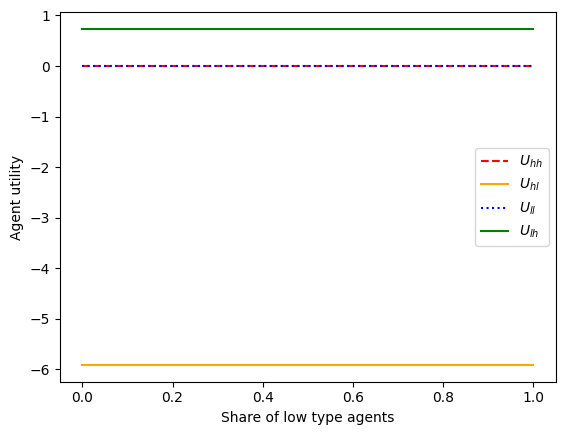

In [17]:
#Now lets work on the graphs for the paper.

#Graph for 1)Observable effort.

#First we filter the data for a specific value of lambda (the results are not sensitive to the value chosen)
filtered = final_df[final_df['lambdaFB'] == np.linspace(0.00001,0.99999,20)[7]]

plt.plot(filtered['alphaFB'], filtered['UhhFB'], label = r'$U_{hh}$', linestyle = '--', color = 'red')
plt.plot(filtered['alphaFB'], filtered['UhlFB'], label = r'$U_{hl}$', color = 'orange')
plt.plot(filtered['alphaFB'], filtered['UllFB'], label = r'$U_{ll}$', linestyle = ':', color = 'blue')
plt.plot(filtered['alphaFB'], filtered['UlhFB'], label = r'$U_{lh}$', color = 'green')

plt.xlabel('Share of low type agents')
plt.ylabel('Agent utility')

plt.legend()

plt.savefig('ObservableEffortUtilities.png')

plt.show()

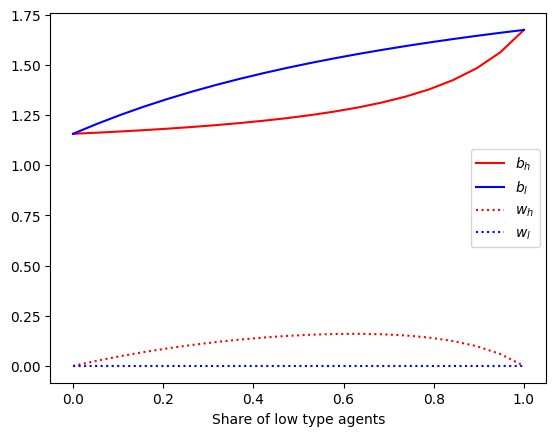

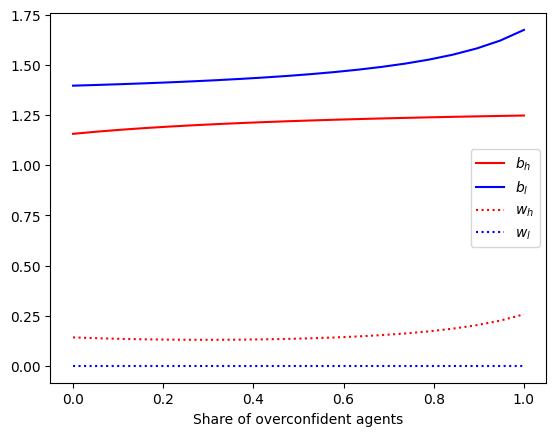

In [18]:
#Graphs for 3) Sophisticated Firm

#Bonus and wage levels with varying alpha

#First we filter the data for a specific value of lambda
filtered = final_df[final_df['lambdaFB'] == np.linspace(0.00001,0.99999,20)[7]]

plt.plot(filtered['alphaSoph'], filtered['bhSoph'], label = r'$b_h$', color = 'red')
plt.plot(filtered['alphaSoph'], filtered['blSoph'], label = r'$b_l$', color = 'blue')
plt.plot(filtered['alphaSoph'], filtered['whSoph'], label = r'$w_h$', linestyle = ':', color = 'red')
plt.plot(filtered['alphaSoph'], filtered['wlSoph'], label = r'$w_l$', linestyle = ':', color = 'blue')

plt.xlabel('Share of low type agents')

plt.legend()
plt.savefig('SophB_and_W_Alpha.png')

plt.show()

#Now we filter the data for a specific value of alpha 
filtered = final_df[final_df['alphaFB'] == np.linspace(0.00001,0.99999,20)[7]]

plt.plot(filtered['lambdaSoph'], filtered['bhSoph'], label = r'$b_h$', color = 'red')
plt.plot(filtered['lambdaSoph'], filtered['blSoph'], label = r'$b_l$', color = 'blue')
plt.plot(filtered['lambdaSoph'], filtered['whSoph'], label = r'$w_h$', linestyle = ':', color = 'red')
plt.plot(filtered['lambdaSoph'], filtered['wlSoph'], label = r'$w_l$', linestyle = ':', color = 'blue')

plt.xlabel('Share of overconfident agents')

plt.legend()
plt.savefig('SophB_and_W_Lambda.png')

plt.show()

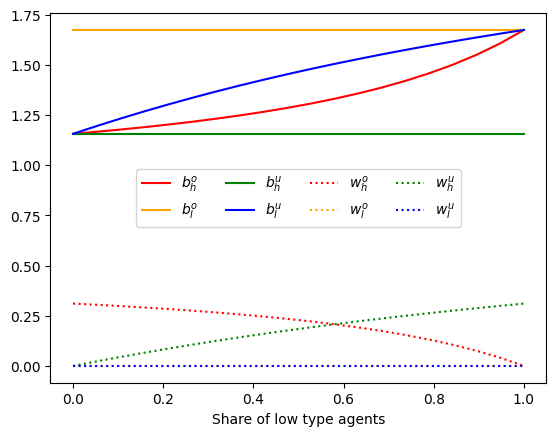

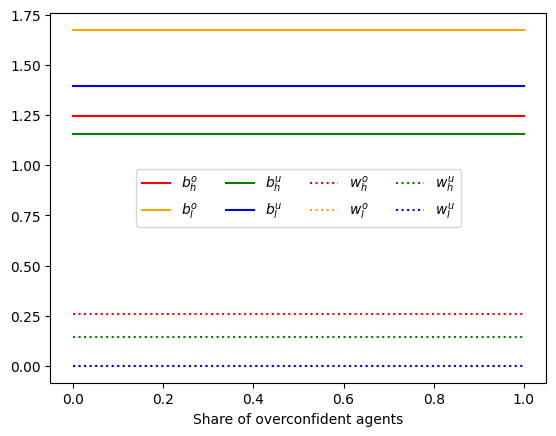

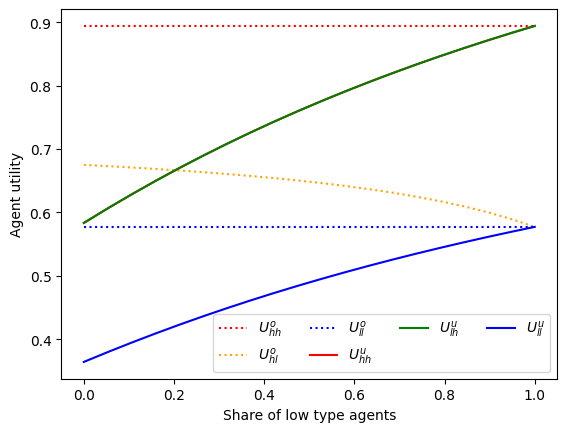

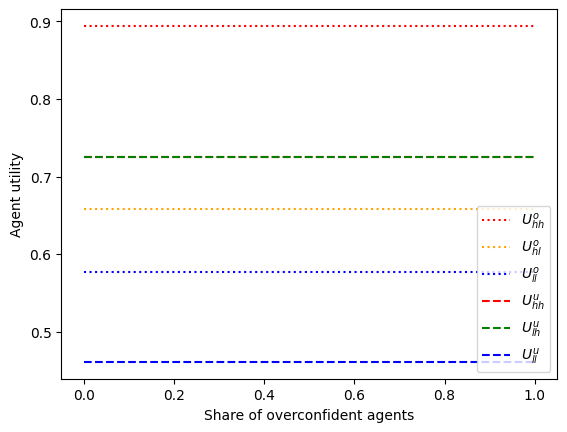

In [19]:
#Graphs for 4) Att Known Firm

#Bonus and wage levels with varying alpha

#First we filter the data for a specific value of lambda
filtered = final_df[final_df['lambdaFB'] == np.linspace(0.00001,0.99999,20)[7]]

plt.plot(filtered['alphaSoph'], filtered['bhoAtt'], label = r'$b_h^o$', color = 'red')
plt.plot(filtered['alphaSoph'], filtered['bloAtt'], label = r'$b_l^o$', color = 'orange')
plt.plot(filtered['alphaSoph'], filtered['bhuAtt'], label = r'$b_h^u$', color = 'green')
plt.plot(filtered['alphaSoph'], filtered['bluAtt'], label = r'$b_l^u$', color = 'blue')
plt.plot(filtered['alphaSoph'], filtered['whoAtt'], label = r'$w_h^o$', linestyle = ':', color = 'red')
plt.plot(filtered['alphaSoph'], filtered['wloAtt'], label = r'$w_l^o$', linestyle = ':', color = 'orange')
plt.plot(filtered['alphaSoph'], filtered['whuAtt'], label = r'$w_h^u$', linestyle = ':', color = 'green')
plt.plot(filtered['alphaSoph'], filtered['wluAtt'], label = r'$w_l^u$', linestyle = ':', color = 'blue')


plt.xlabel('Share of low type agents')

plt.legend(ncol=4, loc = 'center')
plt.savefig('AttB_and_W_Alpha.png')

plt.show()

#Now we filter the data for a specific value of alpha 
filtered = final_df[final_df['alphaFB'] == np.linspace(0.00001,0.99999,20)[7]]

plt.plot(filtered['lambdaSoph'], filtered['bhoAtt'], label = r'$b_h^o$', color = 'red')
plt.plot(filtered['lambdaSoph'], filtered['bloAtt'], label = r'$b_l^o$', color = 'orange')
plt.plot(filtered['lambdaSoph'], filtered['bhuAtt'], label = r'$b_h^u$', color = 'green')
plt.plot(filtered['lambdaSoph'], filtered['bluAtt'], label = r'$b_l^u$', color = 'blue')
plt.plot(filtered['lambdaSoph'], filtered['whoAtt'], label = r'$w_h^o$', linestyle = ':', color = 'red')
plt.plot(filtered['lambdaSoph'], filtered['wloAtt'], label = r'$w_l^o$', linestyle = ':', color = 'orange')
plt.plot(filtered['lambdaSoph'], filtered['whuAtt'], label = r'$w_h^u$', linestyle = ':', color = 'green')
plt.plot(filtered['lambdaSoph'], filtered['wluAtt'], label = r'$w_l^u$', linestyle = ':', color = 'blue')

plt.xlabel('Share of overconfident agents')

plt.legend(ncol=4, loc='center')
plt.savefig('AttB_and_W_Lambda.png')

plt.show()


#Back to filtering the data for a specific value of lambda (the results are not sensitive to the value chosen)
filtered = final_df[final_df['lambdaFB'] == np.linspace(0.00001,0.99999,20)[7]]

plt.plot(filtered['alphaAtt'], filtered['UhhoAtt'], label = r'$U_{hh}^o$',linestyle = ':', color = 'red')
plt.plot(filtered['alphaAtt'], filtered['UhloAtt'], label = r'$U_{hl}^o$',linestyle = ':', color = 'orange')
plt.plot(filtered['alphaAtt'], filtered['UlloAtt'], label = r'$U_{ll}^o$',linestyle = ':', color = 'blue')
plt.plot(filtered['alphaAtt'], filtered['UhhuAtt'], label = r'$U_{hh}^u$', color = 'red')
plt.plot(filtered['alphaAtt'], filtered['UlhuAtt'], label = r'$U_{lh}^u$', color = 'green')
plt.plot(filtered['alphaAtt'], filtered['UlluAtt'], label = r'$U_{ll}^u$', color = 'blue')

plt.xlabel('Share of low type agents')
plt.ylabel('Agent utility')

plt.legend(ncol = 4, loc='lower right')

plt.savefig('AttUtilities.png')

plt.show()

#Back to filtering the data for a specific value of alpha (the results are not sensitive to the value chosen)
filtered = final_df[final_df['alphaFB'] == np.linspace(0.00001,0.99999,20)[7]]

plt.plot(filtered['lambdaAtt'], filtered['UhhoAtt'], label = r'$U_{hh}^o$',linestyle = ':', color = 'red')
plt.plot(filtered['lambdaAtt'], filtered['UhloAtt'], label = r'$U_{hl}^o$',linestyle = ':', color = 'orange')
plt.plot(filtered['lambdaAtt'], filtered['UlloAtt'], label = r'$U_{ll}^o$',linestyle = ':', color = 'blue')
plt.plot(filtered['lambdaAtt'], filtered['UhhuAtt'], label = r'$U_{hh}^u$', linestyle = '--', color = 'red')
plt.plot(filtered['lambdaAtt'], filtered['UlhuAtt'], label = r'$U_{lh}^u$', linestyle = '--', color = 'green')
plt.plot(filtered['lambdaAtt'], filtered['UlluAtt'], label = r'$U_{ll}^u$', linestyle = '--', color = 'blue')

plt.xlabel('Share of overconfident agents')
plt.ylabel('Agent utility')

plt.legend(loc='lower right')

plt.savefig('AttUtilitiesLambda.png')

plt.show()



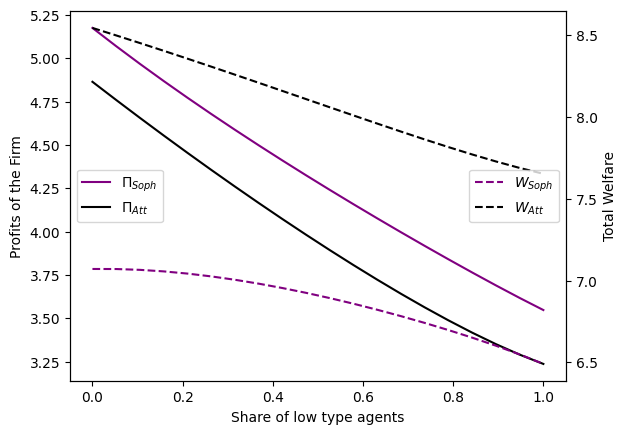

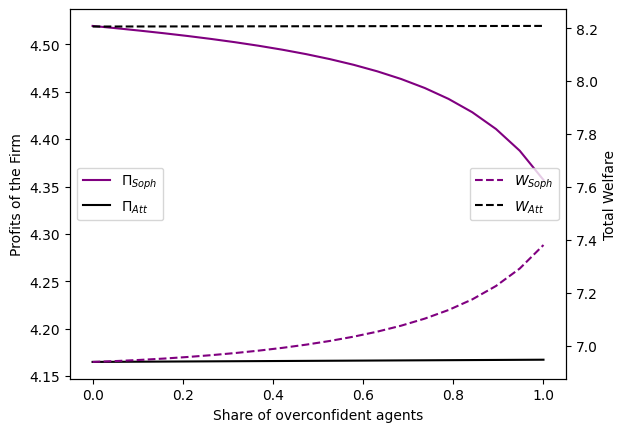

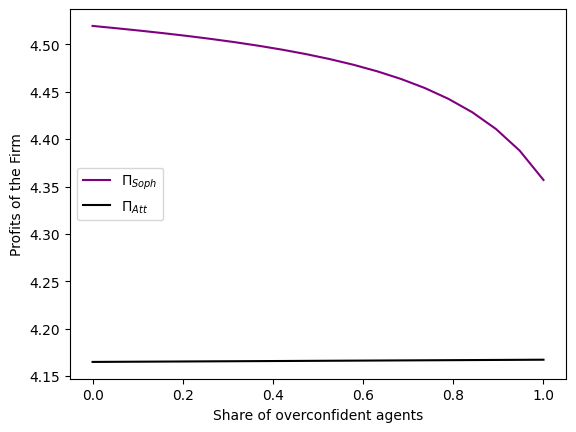

In [20]:
#Graphs of comparison Soph and Att

#First we filter the data for a specific value of lambda (the results are not sensitive to the value chosen)
filtered = final_df[final_df['lambdaFB'] == np.linspace(0.00001,0.99999,20)[7]]

fig, ax1 = plt.subplots()
ax1.plot(filtered['alphaFB'], filtered['piSoph'], label = r'$\Pi_{Soph}$', color = 'purple')
ax1.plot(filtered['alphaFB'], filtered['piAtt'], label = r'$\Pi_{Att}$', color = 'black')
ax1.set_ylabel('Profits of the Firm')

ax2 = ax1.twinx()
ax2.plot(filtered['alphaFB'], filtered['WSoph'], label = r'$W_{Soph}$', linestyle = '--', color = 'purple')
ax2.plot(filtered['alphaFB'], filtered['WAtt'], label = r'$W_{Att}$', linestyle = '--', color = 'black')
ax2.set_ylabel('Total Welfare')

ax1.set_xlabel('Share of low type agents')

ax1.legend(loc='center left')
ax2.legend(loc='center right')

plt.savefig('SophAttCompare.png')

plt.show()

#Now we filter the data for a specific value of alpha (the results are not sensitive to the value chosen)
filtered = final_df[final_df['alphaFB'] == np.linspace(0.00001,0.99999,20)[7]]

fig, ax1 = plt.subplots()
ax1.plot(filtered['lambdaFB'], filtered['piSoph'], label = r'$\Pi_{Soph}$', color = 'purple')
ax1.plot(filtered['lambdaFB'], filtered['piAtt'], label = r'$\Pi_{Att}$', color = 'black')
ax1.set_ylabel('Profits of the Firm')

ax2 = ax1.twinx()
ax2.plot(filtered['lambdaFB'], filtered['WSoph'], label = r'$W_{Soph}$', linestyle = '--', color = 'purple')
ax2.plot(filtered['lambdaFB'], filtered['WAtt'], label = r'$W_{Att}$', linestyle = '--', color = 'black')
ax2.set_ylabel('Total Welfare')

ax1.set_xlabel('Share of overconfident agents')

ax1.legend(loc='center left')
ax2.legend(loc='center right')

plt.savefig('SophAttCompareLambda.png')

plt.show()


#Now we filter the data for a specific value of alpha (the results are not sensitive to the value chosen)
filtered = final_df[final_df['alphaFB'] == np.linspace(0.00001,0.99999,20)[7]]

fig, ax1 = plt.subplots()
ax1.plot(filtered['lambdaFB'], filtered['piSoph'], label = r'$\Pi_{Soph}$', color = 'purple')
ax1.plot(filtered['lambdaFB'], filtered['piAtt'], label = r'$\Pi_{Att}$', color = 'black')
ax1.set_ylabel('Profits of the Firm')



ax1.set_xlabel('Share of overconfident agents')

ax1.legend(loc='center left')


plt.savefig('SophAttComparePILambda.png')

plt.show()
